This data set contains stock market data relevant to the practical execution of trades in the financial markets. 

In particular, it includes order book snapshots and executed trades. 

With one second resolution, it provides a uniquely fine grained look at the micro-structure of modern financial markets.

In [1]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

- Order Book File

The order book file: Provides order book data on the most competitive buy and sell orders entered into the market.The top two levels of the book are shared. The first level of the book will be more competitive in price terms, it will then receive execution priority over the second level.

In the following we use stock_id==0 as example, we can see that 

 - bid-price from Buyer: the "maximun" dollar that "buyer" can accept
$$ bid price1 > bid price2 $$ 

 - ask-price from Seller: the "minimum" dollar that "seller" can accept
$$ ask price1 < ask price2 $$ 

bid/ask_size the number of volumne correspond to the price.


In [2]:
example_book_df = pd.read_parquet(r'./book_train.parquet/stock_id=0/c439ef22282f412ba39e9137a3fdabac.parquet')
example_book_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


In [3]:
example_book_df[:10].to_excel(r'trade_book_sample_data.xlsx')

- Trade book File

In the below trade_book_df, we can point out that in time_id 5 21 seconds in buckets, we have traded share volumne size 326 for stock_id==0, and how many transaction was happend for order_count.

order_count - The number of unique trade orders taking place.

price - The average price of executed transactions happening in one second. Prices have been normalized and the average has been weighted by the number of shares traded in each transaction.

In [4]:
example_trade_book_df = pd.read_parquet(r'trade_train.parquet/stock_id=1/170b39f1f7144bb3b4554aabc336106e.parquet')
example_trade_book_df

,time_id,seconds_in_bucket,price,size,order_count
0,5,28,1.002080,553,11
1,5,39,1.002460,8,3
2,5,42,1.002308,147,4
3,5,44,1.002788,1,1
4,5,51,1.002657,100,2
...,...,...,...,...,...
296205,32767,579,0.999010,81,3
296206,32767,587,0.999109,50,1
296207,32767,588,0.999010,126,2
296208,32767,592,0.999109,1,1


# Order book statistics and visulization

- Bid/Ask Spread

    - (best offer price/ best asking price) - 1 

if bid/ask spread is higher, that means the liquidity for the single asset is not great. The lower the bid/ask spread the better the marekt liquidity for the specific asset.

- Weighted Averaged Price (WAP)

The order book is also one of the primary source for stock valuation. A fair book-based valuation must take two factors into account: the level and the size of orders.


$$ WAP = \frac{BidPrice_{1} * AskSize_{1} + AskPrice_{1} * BidSize_{1}}{BidSize_{1}+AskSize_{1} } $$

As you can see, if two books have both bid and ask offers on the same price level respectively, The one with more offers in place will generate a lower stock valuation, as there are more intended seller in the book, and more seller implies a fact of more supply on the market resulting in a lower stock valuation.

- bid price = 1, ask price =2 

    - More Buyer, more bid szie, therefore higher WAP

$$ WAP_{1} = \frac{1 * 1 + 2 * 2}{3}  = \frac{5}{3}$$

- bid price = 1, ask price =2 

    - More Seller, more ask szie,  therefore lower WAP


$$ WAP_{2} = \frac{1 * 2 + 2 * 1}{3}  = \frac{4}{3}$$


Note that in most of cases, during the continuous trading hours, an order book should not have the scenario when bid order is higher than the offer, or ask, order. In another word, most likely, the bid and ask should never be in cross.

- Log Return 

$$ r_{t1,t2} = log(\frac{S_{t2}}{S_{t1}}) $$


/var/folders/zd/q7f9xjns6w54_qqsgjmv_16r0000gn/T/ipykernel_6959/3517178107.py:6: RuntimeWarning: divide by zero encountered in log
  ax.plot(x,np.log(x),color='blue')


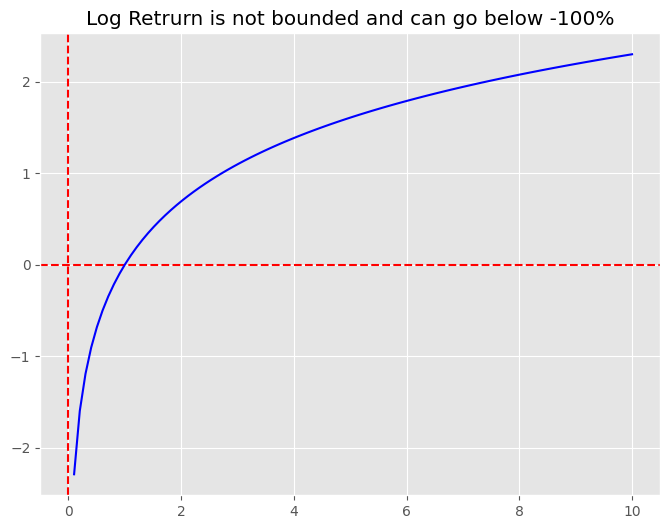

In [5]:
x = np.linspace(0,10,100)
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Log Retrurn is not bounded and can go below -100%')
ax.axhline(0,color='red',linestyle='--')
ax.axvline(0,color='red',linestyle='--')
ax.plot(x,np.log(x),color='blue')
plt.show()

- Realized Volatility 

We want to keep definitions as simple and clear as possible, so that Kagglers without financial knowledge will not be penalized.

So we are not annualizing the volatility and we are assuming that log returns have 0 mean.

$$ \sigma = \sqrt{ \sum_{t}r^{2}_{t-1,t}}$$

Usually the sigma a.k.a volatility, is the sum of the square root of the difference between return and mean return

$$ \sigma = \sqrt{ \sum_{t}(r_{t-1,t}-r_{mean})^{2}}$$

In [6]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff() 


example_book_df.loc[:,('bid/ask spread')] = (example_book_df['ask_price1']/example_book_df['bid_price1'])-1 # Constrcut Bid/Ask Spread.
example_book_df.loc[:,('Total bid/ask1 Size')] = example_book_df['ask_size1'] + example_book_df['bid_size1'] 
example_book_df.loc[:,('wap')] = (example_book_df['bid_price1']*example_book_df['ask_size1'] + example_book_df['ask_price1']*example_book_df['bid_size1']) / (example_book_df['ask_size1'] + example_book_df['bid_size1'])
example_book_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,bid/ask spread,Total bid/ask1 Size,wap
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100,0.000878,229,1.001434
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0.000878,103,1.001448
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0.000878,103,1.001448
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0.000878,129,1.001443
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0.000878,129,1.001443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28,0.000480,180,0.998515
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28,0.000480,181,0.998516
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28,0.000480,181,0.998516
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28,0.000480,182,0.998517


In [8]:
example_book_df.loc[:,('log_return')] = example_book_df.groupby('time_id')['wap'].transform(log_return)
example_book_df = example_book_df[~example_book_df['log_return'].isnull()] # drop the first null return value
example_book_df

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,bid/ask spread,Total bid/ask1 Size,wap,log_return
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100,0.000878,103,1.001448,0.000014
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0.000878,103,1.001448,0.000000
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0.000878,129,1.001443,-0.000005
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100,0.000878,129,1.001443,0.000000
5,5,11,1.001422,1.002301,1.001370,1.002405,3,100,2,100,0.000878,103,1.001448,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28,0.000480,180,0.998515,0.000434
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28,0.000480,181,0.998516,0.000001
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28,0.000480,181,0.998516,0.000000
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28,0.000480,182,0.998517,0.000001


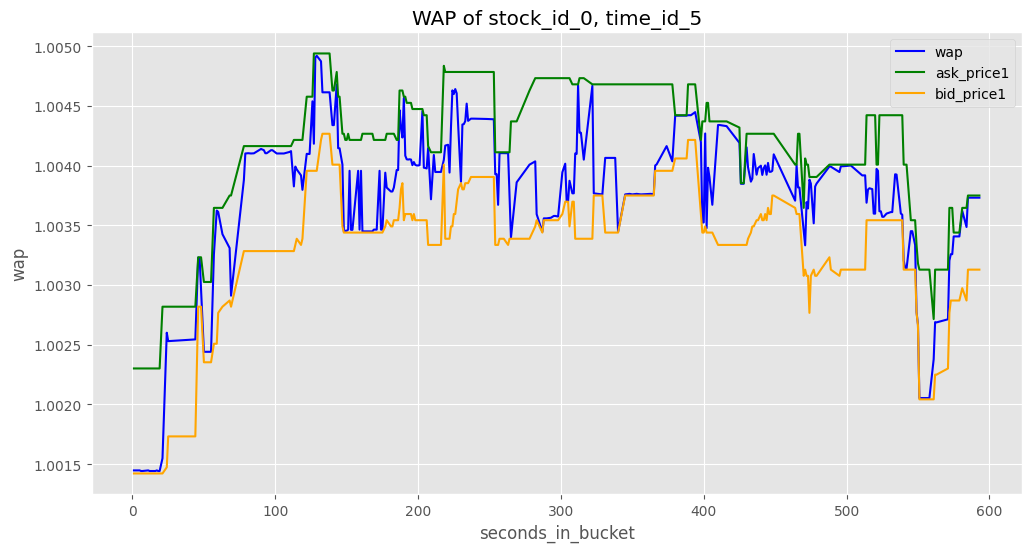

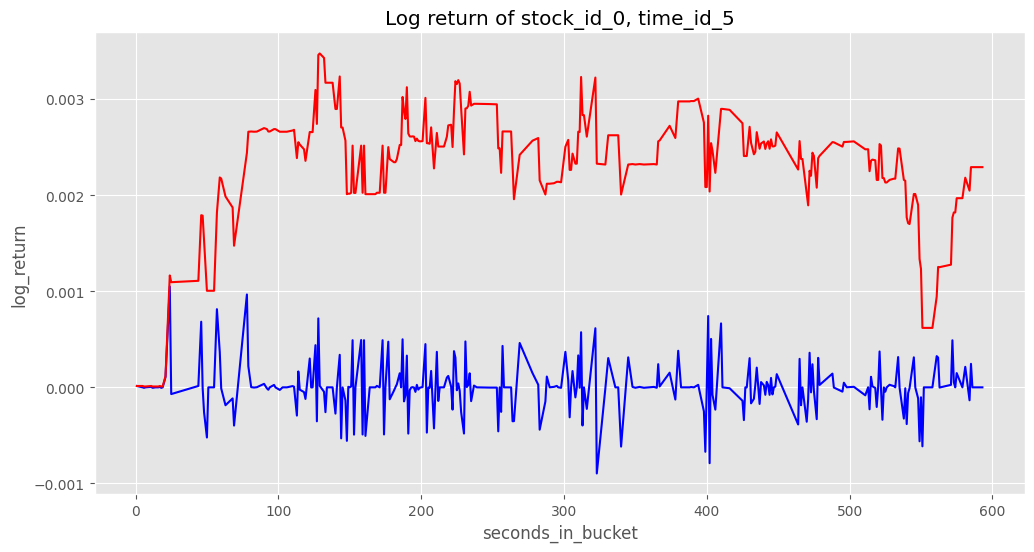

In [9]:
fig ,ax = plt.subplots(figsize=(12,6))
ax.set_title('WAP of stock_id_0, time_id_5')
ax.plot(example_book_df[example_book_df['time_id']==5].seconds_in_bucket,example_book_df[example_book_df['time_id']==5].wap,color="blue",label='wap')
ax.plot(example_book_df[example_book_df['time_id']==5].seconds_in_bucket,example_book_df[example_book_df['time_id']==5].ask_price1,color="green",label='ask_price1')
ax.plot(example_book_df[example_book_df['time_id']==5].seconds_in_bucket,example_book_df[example_book_df['time_id']==5].bid_price1,color="orange",label='bid_price1')
ax.set_xlabel('seconds_in_bucket')
ax.set_ylabel('wap')
ax.legend()

fig ,ax = plt.subplots(figsize=(12,6))
ax.set_title('Log return of stock_id_0, time_id_5')
ax.plot(example_book_df[example_book_df['time_id']==5].seconds_in_bucket,example_book_df[example_book_df['time_id']==5].log_return,color="blue")
ax.plot(example_book_df[example_book_df['time_id']==5].seconds_in_bucket,example_book_df[example_book_df['time_id']==5].log_return.cumsum(),color="red",label='cumulative return')
ax.set_xlabel('seconds_in_bucket')
ax.set_ylabel('log_return')
plt.show()

# Construct Realized Volatility per Time_ID for stock_id == 0

In [10]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

df_realized_vol_per_stock =  example_book_df.groupby(['time_id'])['log_return'].agg(realized_volatility).reset_index(name='realized_volatility')
df_realized_vol_per_stock

,time_id,realized_volatility
0,5,0.004499
1,11,0.001204
2,16,0.002369
3,31,0.002574
4,62,0.001894
...,...,...
3825,32751,0.002579
3826,32753,0.002206
3827,32758,0.002913
3828,32763,0.003046


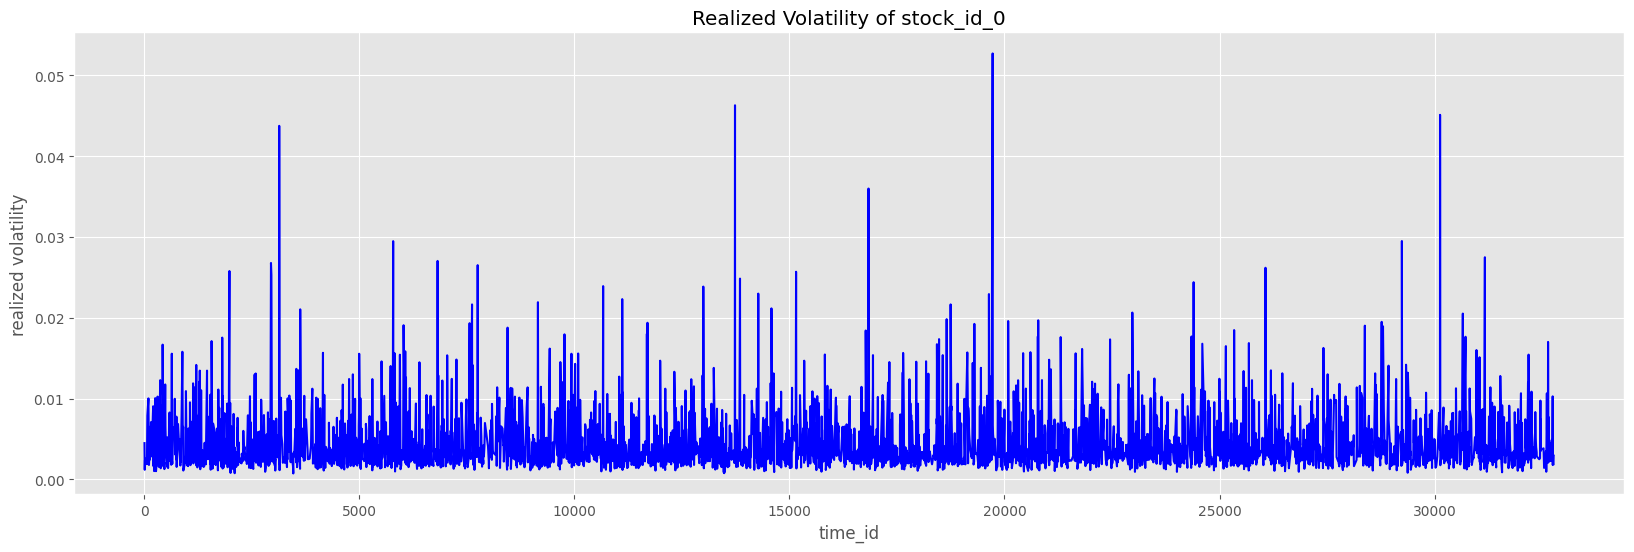

In [11]:
fig ,ax = plt.subplots(figsize=(20,6))
ax.set_title('Realized Volatility of stock_id_0')
ax.plot(df_realized_vol_per_stock.time_id,df_realized_vol_per_stock.realized_volatility,color="blue")
ax.set_xlabel('time_id')
ax.set_ylabel('realized volatility')
plt.show()

# Naive Prediction: Using Last Timestamp realized volatility as target

Now we know hoe to build our predict target, let's using realized volatility of $t_{i-1}$ to predict $t_{i}$ as predeiction benchmark. 

A commonly known fact about volatility is that it tends to be autocorrelated.

We can use this property to implement a naive model that just "predicts" realized volatility by using whatever the realized volatility was in the initial 10 minutes.

In [12]:
import glob
from tqdm import tqdm
from sklearn.metrics import r2_score


list_order_book_file_train = glob.glob(r'./book_train.parquet/*')

print(list_order_book_file_train)
print(len(list_order_book_file_train))

['./book_train.parquet/stock_id=17', './book_train.parquet/stock_id=28', './book_train.parquet/stock_id=10', './book_train.parquet/stock_id=26', './book_train.parquet/stock_id=19', './book_train.parquet/stock_id=21', './book_train.parquet/stock_id=75', './book_train.parquet/stock_id=81', './book_train.parquet/stock_id=86', './book_train.parquet/stock_id=72', './book_train.parquet/stock_id=44', './book_train.parquet/stock_id=88', './book_train.parquet/stock_id=43', './book_train.parquet/stock_id=20', './book_train.parquet/stock_id=27', './book_train.parquet/stock_id=18', './book_train.parquet/stock_id=11', './book_train.parquet/stock_id=16', './book_train.parquet/stock_id=29', './book_train.parquet/stock_id=89', './book_train.parquet/stock_id=42', './book_train.parquet/stock_id=73', './book_train.parquet/stock_id=87', './book_train.parquet/stock_id=80', './book_train.parquet/stock_id=74', './book_train.parquet/stock_id=103', './book_train.parquet/stock_id=104', './book_train.parquet/sto

In [13]:
path = r'./book_train.parquet/stock_id=0'

def realized_volatility_per_stock_and_time(path):

    stock_id = path.split("=")[1]
    example_book_df = pd.read_parquet(path)

    # construct item for realized volatility calculation
    example_book_df.loc[:,('bid/ask spread')] = (example_book_df['ask_price1']/example_book_df['bid_price1'])-1 # Constrcut Bid/Ask Spread.
    example_book_df.loc[:,('Total bid/ask1 Size')] = example_book_df['ask_size1'] + example_book_df['bid_size1'] 
    example_book_df.loc[:,('wap')] = (example_book_df['bid_price1']*example_book_df['ask_size1'] + example_book_df['ask_price1']*example_book_df['bid_size1']) / (example_book_df['ask_size1'] + example_book_df['bid_size1'])
    example_book_df.loc[:,('log_return')] = example_book_df.groupby('time_id')['wap'].transform(log_return)
    example_book_df = example_book_df[~example_book_df['log_return'].isnull()] # drop the first null return value

    # construct realized volatility
    df_realized_vol_per_stock = example_book_df.groupby(['time_id'])['log_return'].agg(realized_volatility).reset_index(name='realized_volatility')
    # for every stock, we have to built a row_id inable for us to submit the prediction result
    df_realized_vol_per_stock.loc[:,('row_id')] = df_realized_vol_per_stock['time_id'].apply(lambda x: f'{stock_id}-{x}')

    return df_realized_vol_per_stock[['row_id','realized_volatility']]

realized_volatility_per_stock_and_time(path)

,row_id,realized_volatility
0,0-5,0.004499
1,0-11,0.001204
2,0-16,0.002369
3,0-31,0.002574
4,0-62,0.001894
...,...,...
3825,0-32751,0.002579
3826,0-32753,0.002206
3827,0-32758,0.002913
3828,0-32763,0.003046


In [14]:
def past_realized_volatility_per_stock(list_file):
    df_past_realized = pd.DataFrame()
    for file in tqdm(list_file):
        df_past_realized = pd.concat([df_past_realized,realized_volatility_per_stock_and_time(file)],axis=0)
    return df_past_realized


df_past_realized_train = past_realized_volatility_per_stock(list_file=list_order_book_file_train)
df_past_realized_train.sort_values(by='row_id')

100%|██████████| 112/112 [00:55<00:00,  2.03it/s]


,row_id,realized_volatility
103,0-1000,0.001731
1185,0-10000,0.002863
1186,0-10005,0.008673
1187,0-10017,0.014300
1188,0-10030,0.002503
...,...,...
1180,99-9972,0.001629
1181,99-9973,0.009243
1182,99-9976,0.005455
1183,99-9988,0.001239


In [15]:
train = pd.read_csv('./train.csv')
train['row_id'] = train['stock_id'].astype(str) + '-' + train['time_id'].astype(str)
train = train[['row_id','target']]
train

,row_id,target
0,0-5,0.004136
1,0-11,0.001445
2,0-16,0.002168
3,0-31,0.002195
4,0-62,0.001747
...,...,...
428927,126-32751,0.003461
428928,126-32753,0.003113
428929,126-32758,0.004070
428930,126-32763,0.003357


- Join the df_train and realized_volatility

In [16]:
df_joined = train.merge(df_past_realized_train, on = ['row_id'], how = 'left')
df_joined

,row_id,target,realized_volatility
0,0-5,0.004136,0.004499
1,0-11,0.001445,0.001204
2,0-16,0.002168,0.002369
3,0-31,0.002195,0.002574
4,0-62,0.001747,0.001894
...,...,...,...
428927,126-32751,0.003461,0.003691
428928,126-32753,0.003113,0.004104
428929,126-32758,0.004070,0.003118
428930,126-32763,0.003357,0.003661


In [17]:
def rmspe(y_true, y_pred):
    return  (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true))))

R2 = round(r2_score(y_true = df_joined['target'], y_pred = df_joined['realized_volatility']),3)
RMSPE = round(rmspe(y_true = df_joined['target'], y_pred = df_joined['realized_volatility']),3)

print(f'Performance of the naive prediction:\nR2 score: {R2}, \nRMSPE: {RMSPE}.')

Performance of the naive prediction:
R2 score: 0.628, 
RMSPE: 0.341.
